<a href="https://colab.research.google.com/github/ivaben/unit-2-project/blob/master/project2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT #**2**

In [240]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*
!pip install category_encoders==2.*
!pip install eli5
!pip install pdpbox
!pip install shap


In [0]:

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read NHL  dataset

import pandas as pd
import numpy as np


url = 'https://raw.githubusercontent.com/ivaben/unit-2-project/master/train.csv'

df = pd.read_csv (url, encoding='iso-8859-1')


In [243]:
df.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,...,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,"2,015",1,18,L,Chabot,Thomas,D,OTT,1,0,0,0,0,0,-2,0,0,13,429,7,7,7,15,0,0,1,750,0,17,0,-2,-17,...,0,0,0,0,0,9,12,8,10,5,8,0,1,2,3,0,2,1,1,0,1,1,2,4,5,1,2,1,1,1,1,0,-0,-0,40,1,0,176,-0,-0
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,"2,012",1,15,R,Ceci,Cody,D,OTT,79,2,15,6,9,17,-11,-10,20,2418,109992,"1,826",23,23,39,30,7,1,989,2,3,40,-29,-1,...,10,0,0,0,0,"1,433","1,992","1,038","1,423",757,997,62,89,197,280,56,85,68,82,79,94,147,176,949,939,749,671,284,197,104,98,-0,3,3,"2,851",290,13,112,14,0
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,"2,006",1,7,R,Okposo,Kyle,RW,BUF,65,19,26,13,13,45,-7,-1,24,1443,73983,"1,229",19,19,33,63,10,1,"1,031",3,2,64,31,2,...,12,0,0,0,0,"1,301","1,051",986,826,734,606,71,46,235,133,71,40,60,34,76,52,136,86,739,600,340,351,168,129,56,70,4,1,5,"2,487",102,7,115,37,1
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,"2,010",1,3,R,Gudbranson,Erik,D,VAN,30,1,5,5,0,6,-14,-5,18,765,36603,608,20,20,36,38,6,1,959,2,3,31,-19,-2,...,4,2,0,0,0,460,605,339,467,259,340,22,34,80,130,16,35,27,20,29,32,56,52,324,328,198,197,86,59,26,22,0,0,0,"1,074",130,18,105,6,0
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,"2,012",1,16,R,Wilson,Tom,RW,WSH,82,7,12,4,8,19,9,4,133,1453,63592,"1,060",13,13,24,61,8,1,995,2,2,43,-10,-1,...,33,9,0,1,1,766,992,546,720,398,495,34,48,124,159,31,41,30,37,43,53,73,90,528,490,512,422,157,126,88,68,-0,1,1,"3,459",425,8,100,22,0


In [244]:
print(df.columns.values)

['Salary' 'Born' 'City' 'Pr/St' 'Cntry' 'Nat' 'Ht' 'Wt' 'DftYr' 'DftRd'
 'Ovrl' 'Hand' 'Last Name' 'First Name' 'Position' 'Team' 'GP' 'G' 'A'
 'A1' 'A2' 'PTS' '+/-' 'E+/-' 'PIM' 'Shifts' 'TOI' 'TOIX' 'TOI/GP'
 'TOI/GP.1' 'TOI%' 'IPP%' 'SH%' 'SV%' 'PDO' 'F/60' 'A/60' 'Pct%' 'Diff'
 'Diff/60' 'iCF' 'iCF.1' 'iFF' 'iSF' 'iSF.1' 'iSF.2' 'ixG' 'iSCF' 'iRB'
 'iRS' 'iDS' 'sDist' 'sDist.1' 'Pass' 'iHF' 'iHF.1' 'iHA' 'iHDf' 'iMiss'
 'iGVA' 'iTKA' 'iBLK' 'iGVA.1' 'iTKA.1' 'iBLK.1' 'BLK%' 'iFOW' 'iFOL'
 'iFOW.1' 'iFOL.1' 'FO%' '%FOT' 'dzFOW' 'dzFOL' 'nzFOW' 'nzFOL' 'ozFOW'
 'ozFOL' 'FOW.Up' 'FOL.Up' 'FOW.Down' 'FOL.Down' 'FOW.Close' 'FOL.Close'
 'OTG' '1G' 'GWG' 'ENG' 'PSG' 'PSA' 'G.Bkhd' 'G.Dflct' 'G.Slap' 'G.Snap'
 'G.Tip' 'G.Wrap' 'G.Wrst' 'CBar ' 'Post' 'Over' 'Wide' 'S.Bkhd' 'S.Dflct'
 'S.Slap' 'S.Snap' 'S.Tip' 'S.Wrap' 'S.Wrst' 'iPenT' 'iPenD' 'iPENT'
 'iPEND' 'iPenDf' 'NPD' 'Min' 'Maj' 'Match' 'Misc' 'Game' 'CF' 'CA' 'FF'
 'FA' 'SF' 'SA' 'xGF' 'xGA' 'SCF' 'SCA' 'GF' 'GA' 'RBF' 'RBA' 'RSF' 

In [0]:
# Drop columns
columns = {'City', 'Pr/St', 'Cntry', 'Ht', 'Wt', '+/-',	'E+/-',	'PIM',	'Shifts', 'DftRd', 'Ovrl', 'First Name', 'FOW.Down', 'FOL.Down','TOIX', 'TOI/GP', 'TOI/GP.1', 'TOI%', 'Pct%', 'iCF.1', 'iSF.1', 'iSF.2', 'iHDf',
                               'FOW.Close', 'FOL.Close','G.Bkhd', 'G.Dflct', 'G.Slap', 'G.Snap', 'G.Tip', 'G.Wrap', 'sDist.1',
                                'G.Wrst', 'dzFOW', 'dzFOL', 'nzFOW', 'nzFOL','RSA', 'RSF', 'S.Bkhd', 'S.Dflct',
                               'S.Slap', 'S.Snap', 'S.Tip', 'S.Wrap', 'S.Wrst', 'FF',	'FA', 'iPenT', 'iPenD', 'iFOW.1',
                               'iFOL.1', 'FO%', '%FOT',
                               'iPENT', 'iPEND', 'iPenDf', 'NPD', 'Min',	'Maj',	'Match',	'Misc', 'Game', 'iHF.1', 'iGVA.1', 'iTKA.1', 'iBLK.1', 'BLK%',	}
df = df.drop(df[columns], axis = 1)

In [246]:
df.shape

(612, 86)

Your code starts here:

In [0]:
# Change column names: replace spaces with underscores

In [248]:
df.rename(columns={'Last Name':'Last_name','Nat':'Nationality', 'GP':'Games_played',
                   'G':'Goals','PTS':'Points','PIM':'Penalty_minutes', 'A':'Events_against_per_60_minutes', 
                   'A1':'Primary_assists', 'A2':'Secondary_Assists', 'TOI':'Time_on_ice', 'SH%':'Team_shooting_player_on_the_ice', 
                   'SV%':'Team_save_player_oti', 'PDO':'Teams_shooting_save',
                   'F/60':'Events_for/60_min', 'A/60':'Events_against/60_min','Diff':'Events_for_minus', 'Diff/60':'Events_for_minus/60_min',
                   'iCF':'Shot_attempts', 'iFF':'Unblocked_shot_attempts', 
                   'iSF':'Shots_on_goal', 'ixG':'Expected_goals','iSCF':'All_scorring_chances','iRB':'Rebound_shots', 'iRS':'Shots_off_the_rush',
                   'iDS':'Dangerous_shots', 'sDist':'Shot_distance', 'Pass':'Passes_result_in_shot_attempt', 'iHF':'Hits_thrown', 'iHA':'Hits_taken',
                   'iMiss':'Ind_shots_taken_that_missed_the_net', 'iGVA':'Giveaways', 'iTKA':'Takeaways', 'iBLK':'Shots_blocked', 'iFOW':'Faceoff_wins', 'iFOL':'Faceoff_losses', 
                   'ozFOW':'Offensive_zone_faceoff_won', 'ozFOL':'Offensive_zone_faceoff_lost', 'FOW.Up':'Faceoffs_won_leading_team', 'FOL.Up':'Faceoffs_lost_leading_team', 
                   'OTG':'Overtime_goals', '1G':'First_goal', 'GWG':'Game_winning_goals', 'ENG':'Empty_net_goals', 'PSG':'Penalty_shot_goals',
                   'PSA':'Penalty_shot_attemtpts', 'CBar ':'Crossbars_hit', 'Post':'Times_hit_the_post', 'Over':'Shots_over_the_net', 'Wide':'Shots_wide_of_the_net', 
                   'CF':'Team_shots_attempts', 'CA':'Shot_attempts_allowed_player_oti', 'SF':'Team_shots_player_oti', 'SA':'Shots_on_goal_allowed_player_oti', 'xGF':'Team_expected_goals_player_oti',

                   'xGA':'Expected_goals_attempt_player_oti', 'SCF':'Team_scoring_chances_player_oti', 'SCA':'Scoring_chances_allowed_player-oti', 
                   'GF':'Teams_goal_player_oti', 'GA':'Goal_allowed_player_oti', 'RBF':'Teams_rebounds_player_oti', 'RBA':'Rebounds_allowed_player_oti', 
                   'DSF':'Dangerous_shots_player_oti', 'DSA':'Dangerous_shots_allowe_player_oti', 'FOW':'Teams_faceoff_wins_player_oti','FOL':'Teams_faceoff_lost-player_oti',
                   'HF':'Teams_hits_thrown_player_oti', 'HA':'Teams_hits_taken_player_oti', 'GVA':'Teams_giveaways_player_oti', 'TKA':'Teams_takeaways_player_oti',
                   'PENT':'Teams_penalties_taken_player_oti', 'PEND':'Teams_penalties_drawn_player_oti', 'OPS':'Offensive_point_shares', 
                   'DPS':'Defensive_point_shares', 'PS':'Point_shares','OTOI':'Player_not_oti', 'Grit':'Defined_hits_blocked_shots_penalty_minutes_majors', 'DAP':'Disciplined_aggression_proxy', 
                   'Pace':'Average_game_pace', 'GS':'Players_combined_game_score', 'GS/G':'Players_average_game_score', 'IPP%':'Indiv_points' }, inplace=True)
df.head()

,Salary,Born,Nationality,DftYr,Hand,Last_name,Position,Team,Games_played,Goals,Events_against_per_60_minutes,Primary_assists,Secondary_Assists,Points,Time_on_ice,Indiv_points,Team_shooting_player_on_the_ice,Team_save_player_oti,Teams_shooting_save,Events_for/60_min,Events_against/60_min,Events_for_minus,Events_for_minus/60_min,Shot_attempts,Unblocked_shot_attempts,Shots_on_goal,Expected_goals,All_scorring_chances,Rebound_shots,Shots_off_the_rush,Dangerous_shots,Shot_distance,Passes_result_in_shot_attempt,Hits_thrown,Hits_taken,Ind_shots_taken_that_missed_the_net,Giveaways,Takeaways,Shots_blocked,Faceoff_wins,...,First_goal,Game_winning_goals,Empty_net_goals,Penalty_shot_goals,Penalty_shot_attemtpts,Crossbars_hit,Times_hit_the_post,Shots_over_the_net,Shots_wide_of_the_net,Team_shots_attempts,Shot_attempts_allowed_player_oti,Team_shots_player_oti,Shots_on_goal_allowed_player_oti,Team_expected_goals_player_oti,Expected_goals_attempt_player_oti,Team_scoring_chances_player_oti,Scoring_chances_allowed_player-oti,Teams_goal_player_oti,Goal_allowed_player_oti,Teams_rebounds_player_oti,Rebounds_allowed_player_oti,Dangerous_shots_player_oti,Dangerous_shots_allowe_player_oti,Teams_faceoff_wins_player_oti,Teams_faceoff_lost-player_oti,Teams_hits_thrown_player_oti,Teams_hits_taken_player_oti,Teams_giveaways_player_oti,Teams_takeaways_player_oti,Teams_penalties_taken_player_oti,Teams_penalties_drawn_player_oti,Offensive_point_shares,Defensive_point_shares,Point_shares,Player_not_oti,Defined_hits_blocked_shots_penalty_minutes_majors,Disciplined_aggression_proxy,Average_game_pace,Players_combined_game_score,Players_average_game_score
0,925000,97-01-30,CAN,"2,015",L,Chabot,D,OTT,1,0,0,0,0,0,429,0,0,1,750,0,17,-2,-17,2,2,1,0,0,0,0,0,43,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,9,12,5,8,0,1,2,3,0,2,1,1,1,2,4,5,1,2,1,1,1,1,0,-0,-0,40,1,0,176,-0,-0
1,2250000,93-12-21,CAN,"2,012",R,Ceci,D,OTT,79,2,15,6,9,17,109992,30,7,1,989,2,3,-29,-1,287,197,143,6,7,7,9,16,52,138,111,154,54,74,22,159,1,...,0,0,0,0,0,0,1,2,51,"1,433","1,992",757,997,62,89,197,280,56,85,68,82,147,176,949,939,749,671,284,197,104,98,-0,3,3,"2,851",290,13,112,14,0
2,8000000,88-04-16,USA,"2,006",R,Okposo,RW,BUF,65,19,26,13,13,45,73983,63,10,1,"1,031",3,2,31,2,283,212,155,17,64,16,20,36,28,197,53,68,57,36,26,25,54,...,5,2,0,0,0,0,2,4,51,"1,301","1,051",734,606,71,46,235,133,71,40,60,34,136,86,739,600,340,351,168,129,56,70,4,1,5,"2,487",102,7,115,37,1
3,3500000,92-01-07,CAN,"2,010",R,Gudbranson,D,VAN,30,1,5,5,0,6,36603,38,6,1,959,2,3,-19,-2,88,55,40,1,2,1,4,5,55,153,66,66,15,23,4,44,0,...,0,1,0,0,0,0,0,0,15,460,605,259,340,22,34,80,130,16,35,27,20,56,52,324,328,198,197,86,59,26,22,0,0,0,"1,074",130,18,105,6,0
4,1750000,94-03-29,CAN,"2,012",R,Wilson,RW,WSH,82,7,12,4,8,19,63592,61,8,1,995,2,2,-10,-1,166,118,95,9,35,8,10,18,31,96,239,134,23,21,36,44,3,...,2,0,1,0,0,0,2,1,20,766,992,398,495,34,48,124,159,31,41,30,37,73,90,528,490,512,422,157,126,88,68,-0,1,1,"3,459",425,8,100,22,0


In [249]:
df.columns

Index(['Salary', 'Born', 'Nationality', 'DftYr', 'Hand', 'Last_name',
       'Position', 'Team', 'Games_played', 'Goals',
       'Events_against_per_60_minutes', 'Primary_assists', 'Secondary_Assists',
       'Points', 'Time_on_ice', 'Indiv_points',
       'Team_shooting_player_on_the_ice', 'Team_save_player_oti',
       'Teams_shooting_save', 'Events_for/60_min', 'Events_against/60_min',
       'Events_for_minus', 'Events_for_minus/60_min', 'Shot_attempts',
       'Unblocked_shot_attempts', 'Shots_on_goal', 'Expected_goals',
       'All_scorring_chances', 'Rebound_shots', 'Shots_off_the_rush',
       'Dangerous_shots', 'Shot_distance', 'Passes_result_in_shot_attempt',
       'Hits_thrown', 'Hits_taken', 'Ind_shots_taken_that_missed_the_net',
       'Giveaways', 'Takeaways', 'Shots_blocked', 'Faceoff_wins',
       'Faceoff_losses', 'Offensive_zone_faceoff_won',
       'Offensive_zone_faceoff_lost', 'Faceoffs_won_leading_team',
       'Faceoffs_lost_leading_team', 'Overtime_goals', 'Fir

In [250]:
# Look how many rows you have?
df.shape

(612, 86)

In [0]:
df.fillna(0,inplace=True)

In [252]:
# Choose your target
# Which column in your tabular dataset will you predict

df['Salary'].dtypes

dtype('int64')

In [253]:
#  What is the maximum Salary in this dataset?
pd.options.display.float_format = '{:,.0f}'.format
df['Salary'].describe()

count          612
mean     2,264,509
std      2,236,340
min        575,000
25%        742,500
50%        925,000
75%      3,500,000
max     13,800,000
Name: Salary, dtype: float64

In [254]:
# Look at the row with the max Salary
import numpy as np

print(df[df.Salary == df.Salary.max()]) 

       Salary  ... Players_average_game_score
103  13800000  ...                          1
496  13800000  ...                          1

[2 rows x 86 columns]


In [255]:
# Salary is my target

target = 'Salary'
df[target].value_counts(normalize=False)

925000     80
575000     39
600000     29
4000000    20
5000000    19
           ..
3275000     1
850000      1
620000      1
2825000     1
7500000     1
Name: Salary, Length: 138, dtype: int64

In [0]:
features = ['Born', 'Nationality', 'DftYr', 'Hand', 'Last_name',
       'Position', 'Team', 'Games_played', 'Goals',
       'Events_against_per_60_minutes', 'Primary_assists', 'Secondary_Assists',
       'Points', 'Time_on_ice', 'Indiv_points',
       'Team_shooting_player_on_the_ice', 'Team_save_player_oti',
       'Teams_shooting_save', 'Events_for/60_min', 'Events_against/60_min',
       'Events_for_minus', 'Events_for_minus/60_min', 'Shot_attempts',
       'Unblocked_shot_attempts', 'Shots_on_goal', 'Expected_goals',
       'All_scorring_chances', 'Rebound_shots', 'Shots_off_the_rush',
       'Dangerous_shots', 'Shot_distance', 'Passes_result_in_shot_attempt',
       'Hits_thrown', 'Hits_taken', 'Ind_shots_taken_that_missed_the_net',
       'Giveaways', 'Takeaways', 'Shots_blocked', 'Faceoff_wins',
       'Faceoff_losses', 'Offensive_zone_faceoff_won',
       'Offensive_zone_faceoff_lost', 'Faceoffs_won_leading_team',
       'Faceoffs_lost_leading_team', 'Overtime_goals', 'First_goal',
       'Game_winning_goals', 'Empty_net_goals', 'Penalty_shot_goals',
       'Penalty_shot_attemtpts', 'Crossbars_hit', 'Times_hit_the_post',
       'Shots_over_the_net', 'Shots_wide_of_the_net', 'Team_shots_attempts',
       'Shot_attempts_allowed_player_oti', 'Team_shots_player_oti',
       'Shots_on_goal_allowed_player_oti', 'Team_expected_goals_player_oti',
       'Expected_goals_attempt_player_oti', 'Team_scoring_chances_player_oti',
       'Scoring_chances_allowed_player-oti', 'Teams_goal_player_oti',
       'Goal_allowed_player_oti', 'Teams_rebounds_player_oti',
       'Rebounds_allowed_player_oti', 'Dangerous_shots_player_oti',
       'Dangerous_shots_allowe_player_oti', 'Teams_faceoff_wins_player_oti',
       'Teams_faceoff_lost-player_oti', 'Teams_hits_thrown_player_oti',
       'Teams_hits_taken_player_oti', 'Teams_giveaways_player_oti',
       'Teams_takeaways_player_oti', 'Teams_penalties_taken_player_oti',
       'Teams_penalties_drawn_player_oti', 'Offensive_point_shares',
       'Defensive_point_shares', 'Point_shares', 'Player_not_oti',
       'Defined_hits_blocked_shots_penalty_minutes_majors',
       'Disciplined_aggression_proxy', 'Average_game_pace',
       'Players_combined_game_score', 'Players_average_game_score']

target = 'Salary'

train = [features] + [target]


# Which column in your tabular dataset will you predict?

In [0]:
target = 'Salary'

# How is your target distributed?

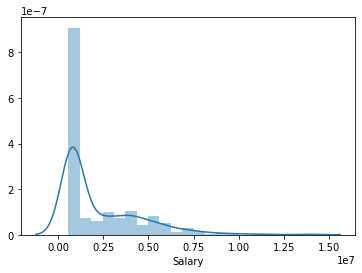

In [258]:
import seaborn as sns
sns.distplot(df[target]);

# Log-Transform

If the target is right-skewed, you may want to "log transform" the target.



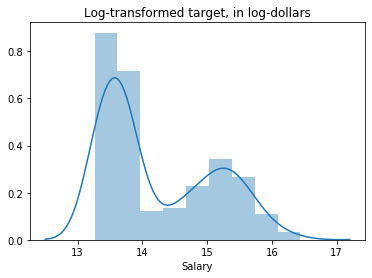

In [259]:
import numpy as np
import matplotlib.pyplot as plt
y_log = np.log1p(df[target])

sns.distplot(y_log)
plt.title('Log-transformed target, in log-dollars');

# Choose your evaluation metric(s)

Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?

# 1. Begin with baselines for regression

In [260]:
pd.options.display.float_format = '{:,.0f}'.format
df['Salary'].describe()

count          612
mean     2,264,509
std      2,236,340
min        575,000
25%        742,500
50%        925,000
75%      3,500,000
max     13,800,000
Name: Salary, dtype: float64

Avarage salary in NHL per player is $2,3 million . So that could be a reasonable first guess.

In [0]:
guess = df['Salary'].mean()
errors = guess - df['Salary']
mean_absolute_error = errors.abs().mean()

In [262]:
print(f'If we just guessed that every player in NHL earn ${guess:,.0f},')
print(f'we would be off by ${mean_absolute_error:,.0f} on average.')

If we just guessed that every player in NHL earn $2,264,509,
we would be off by $1,775,263 on average.


# What is the Mean Absolute Error and R^2 score for a mean baseline? 

In [263]:
df['Salary'].mean()

2264508.7826797385

In [264]:
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train = df['Salary']
y_test = df['Salary']
y_pred_train = [y_train.mean()] * len(y_train)
y_pred_test  = [y_train.mean()] * len(y_test)

print('Mean Baseline:')
print('Train Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Test Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Train Mean Absolute Error:', mean_absolute_error(y_train, y_pred_train))
print('Test Mean Absolute Error:', mean_absolute_error(y_test, y_pred_test))
print('Train R^2 Score:', r2_score(y_train, y_pred_train))
print('Test R^2 Score:', r2_score(y_test, y_pred_test))

Mean Baseline:
Train Root Mean Squared Error: 2234512.183982693
Test Root Mean Square Error: 2234512.183982693
Train Mean Absolute Error: 1775263.437006066
Test Mean Absolute Error: 1775263.437006066
Train R^2 Score: 0.0
Test R^2 Score: 0.0


# 2. Predictive Model

In [265]:
# Make a Plotly Express scatter plot of Goals vs Salary

import plotly.express as px
px.scatter(df, x="Goals", y="Salary"
           , trendline='ols', color='Salary',
           title='Comparasion: Salary vs. Goals'
           
           , template='plotly_dark'
          )

# 3. Follow the 5 step process, and refer to Scikit-Learn LinearRegression documentation.

Linear Regression with one feature

In [266]:
# 1. Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression

# 2. Instantiate this class
model = LinearRegression()

# 3. Arrange X features matrix & y target vector
features = ['Goals']
target = 'Salary'
X_train = df[features]
y_train = df[target]

# 4. Fit the model
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [267]:
# 5. Apply the model to new data
goals = 20
X_test = [[goals]]
y_pred = model.predict(X_test)

y_pred

array([3965759.35443263])

# we'll look at the coef_ and intercept_ attributes of the LinearRegression object.

In [268]:
model.coef_

array([138803.53951643])

In [269]:
model.intercept_

1189688.564103952

In [0]:
# Equations for a line
m = model.coef_[0]
b = model.intercept_

In [271]:
print('y = mx + b')
print(f'y = {m:,.0f}*x + {b:,.0f}')
print(f'Salary = {m:,.0f} * Goals + {b:,.0f}')

y = mx + b
y = 138,804*x + 1,189,689
Salary = 138,804 * Goals + 1,189,689


In [272]:
def predict(goals):
    y_pred = model.predict([[goals]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    result = f'${estimate:,.0f} estimated salary for {goals:,.0f} goals.' 
    explanation = f'In this linear regression, each additional goal adds ${coefficient:,.0f}.'
    return result + '\n' + explanation

print(predict(20))

$3,965,759 estimated salary for 20 goals.
In this linear regression, each additional goal adds $138,804.


In [273]:
# What does the model predict not to many shooted goals?
print(predict(5))

$1,883,706 estimated salary for 5 goals.
In this linear regression, each additional goal adds $138,804.


# Split Data to train and test datasets

In [274]:
# Split dataset
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42)
train.shape, test.shape

((459, 86), (153, 86))

In [0]:
df['Born'] = pd.to_datetime(df['Born'], infer_datetime_format=True)


Overtime_goals - Overtime Goals has 83% zeros
therefore we will deal with zeros

In [0]:
# Treat zeros like null values. 
# Replace in both sets with the mean from the training set.
train['Overtime_goals'] = train['Overtime_goals'].replace(0, train['Overtime_goals'].mean())
test['Overtime_goals'] = test['Overtime_goals'].replace(0, train['Overtime_goals'].mean())

In [277]:
# Split train into train & val
train, val = train_test_split(train,
                              random_state=42)

train.shape, val.shape, test.shape

((344, 86), (115, 86), (153, 86))

In [0]:
# Wrangle train & test sets in the same way
def engineer_features(df):
    
    # Avoid SettingWithCopyWarning
    df = df.copy()

    
        
    

    return df

train = engineer_features(train)
test = engineer_features(test)

In [279]:
import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


target = 'Salary'
high_cardinality = ['Team', 'Born', 'Last_name']
features = train.columns.drop([target] + high_cardinality)
X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    SelectKBest(f_regression, k=20), 
    Ridge(alpha=1.0)
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [1234359.22646168 1006448.60806895  942341.37171203]


In [280]:
-scores.mean()

1061049.73541422

# Random Forest

In [281]:
from sklearn.ensemble import RandomForestRegressor

features = train.columns.drop(target)
X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [ 997528.2173913  1021626.82608696  839674.06798246]


In [282]:
-scores.mean()

952943.0371535723

# Hyperparameters

In [283]:
print('Model Hyperparameters:')
print(pipeline.named_steps['randomforestregressor'])

Model Hyperparameters:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


# Validation Curve

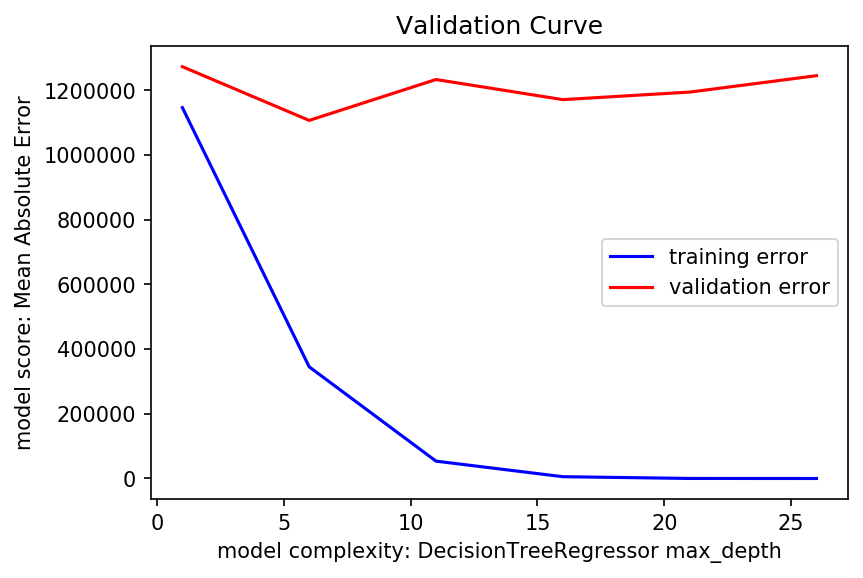

In [284]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    DecisionTreeRegressor()
)

depth = range(1, 30, 5)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='decisiontreeregressor__max_depth', 
    param_range=depth, scoring='neg_mean_absolute_error', 
    cv=3,
    n_jobs=-1
)

plt.figure(dpi=150)
plt.plot(depth, np.mean(-train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(-val_scores, axis=1), color='red', label='validation error')
plt.title('Validation Curve')
plt.xlabel('model complexity: DecisionTreeRegressor max_depth')
plt.ylabel('model score: Mean Absolute Error')
plt.legend();

# Randomized Search CV.

# Using GridSearchCV

In [285]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

features = train.columns.drop([target] + high_cardinality)
X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(), 
    SelectKBest(f_regression), 
    Ridge()
)

param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'selectkbest__k': range(1, len(X_train.columns)+1), 
    'ridge__alpha': [0.1, 1, 10], 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=5, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

In [286]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'simpleimputer__strategy': 'median', 'selectkbest__k': 53, 'ridge__alpha': 10}
Cross-validation MAE 1049290.8796345573


# Using scipy.stats module for tunning the hyper-parameters of an estimators

In [287]:
from scipy.stats import randint, uniform

features = train.columns.drop(target)
X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=42)
)

param_distributions = {
    
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1), 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   24.7s finished


In [288]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.9579424029640752, 'randomforestregressor__n_estimators': 117, 'simpleimputer__strategy': 'median'}
Cross-validation MAE 949777.8412609934


# Arrange data into X features matrix and y target vector

In [0]:
target = 'Salary'

X_train, X_val, X_test = train.drop(columns=[target]), val.drop(columns=[target]), test.drop(columns=[target])
y_train, y_val, y_test = train[target], val[target], test[target]

# Encode your categorical feature(s).

In [290]:
import category_encoders as ce

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

X_train_encoded.head()

,Born_91-11-01,Born_93-07-12,Born_89-07-05,Born_97-05-26,Born_92-04-20,Born_93-03-26,Born_98-03-31,Born_96-01-22,Born_96-10-08,Born_96-02-07,Born_95-04-05,Born_92-03-03,Born_97-07-19,Born_92-02-08,Born_94-05-16,Born_90-09-21,Born_93-03-28,Born_83-12-19,Born_84-01-04,Born_94-04-11,Born_86-09-07,Born_83-10-09,Born_90-05-31,Born_93-02-10,Born_94-07-08,Born_90-09-20,Born_83-06-03,Born_91-09-25,Born_80-11-11,Born_85-07-15,Born_94-03-29,Born_92-02-25,Born_87-01-21,Born_83-08-13,Born_93-03-12,Born_90-07-04,Born_98-03-14,Born_89-05-08,Born_90-12-01,Born_93-04-16,...,First_goal,Game_winning_goals,Empty_net_goals,Penalty_shot_goals,Penalty_shot_attemtpts,Crossbars_hit,Times_hit_the_post,Shots_over_the_net,Shots_wide_of_the_net,Team_shots_attempts,Shot_attempts_allowed_player_oti,Team_shots_player_oti,Shots_on_goal_allowed_player_oti,Team_expected_goals_player_oti,Expected_goals_attempt_player_oti,Team_scoring_chances_player_oti,Scoring_chances_allowed_player-oti,Teams_goal_player_oti,Goal_allowed_player_oti,Teams_rebounds_player_oti,Rebounds_allowed_player_oti,Dangerous_shots_player_oti,Dangerous_shots_allowe_player_oti,Teams_faceoff_wins_player_oti,Teams_faceoff_lost-player_oti,Teams_hits_thrown_player_oti,Teams_hits_taken_player_oti,Teams_giveaways_player_oti,Teams_takeaways_player_oti,Teams_penalties_taken_player_oti,Teams_penalties_drawn_player_oti,Offensive_point_shares,Defensive_point_shares,Point_shares,Player_not_oti,Defined_hits_blocked_shots_penalty_minutes_majors,Disciplined_aggression_proxy,Average_game_pace,Players_combined_game_score,Players_average_game_score
33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,17,290,268,163,140,14,11,52,36,13,8,19,8,37,21,162,131,146,196,55,34,18,24,0,1,1,"1,368",37,9,99,11,0
527,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,1,3,34,"1,155","1,176",641,625,53,47,194,140,63,51,37,30,90,81,633,600,352,442,136,128,66,64,1,3,4,"2,677",129,4,106,28,0
74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,4,3,32,958,"1,055",506,546,40,49,124,159,32,40,42,36,87,89,523,502,568,538,190,59,62,52,-0,2,1,"3,334",160,22,105,21,0
591,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12,28,8,14,0,2,1,5,0,2,0,3,0,4,7,8,8,7,5,4,3,0,-0,-0,-0,97,7,0,123,-2,-1
401,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,38,53,15,29,1,3,4,9,1,3,0,1,2,4,23,29,41,20,6,4,4,4,0,0,0,242,35,8,96,-0,-0


# fit a linear regression and ridge regression model

In [291]:
from sklearn.linear_model import LinearRegression, Ridge

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_encoded, y_train)

ridge = Ridge()
ridge.fit(X_train_encoded, y_train)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# Report validation MAE and  R2

In [292]:
y_pred = lin_reg.predict(X_val_encoded)
print(f'LinReg MAE: {mean_absolute_error(y_val, y_pred)}')
print(f'LinReg R2: {r2_score(y_val, y_pred)}')

y_pred = ridge.predict(X_val_encoded)
print(f'Ridge MAE: {mean_absolute_error(y_val, y_pred)}')
print(f'Ridge R2: {r2_score(y_val, y_pred)}')

LinReg MAE: 1273686.0719814606
LinReg R2: 0.3534202475769834
Ridge MAE: 1431475.5080375639
Ridge R2: 0.07027962832499068


# Linear Regression R^2

In [293]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.TargetEncoder(),  
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 -0.17252570727195327


# Permutation and Boosting

In [0]:
# Arrange data into X features matrix and y target vector
target = 'Salary'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

In [295]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Score', pipeline.score(X_val, y_val))

Score 0.4526107315779647


# 1. (Default) Feature Importances

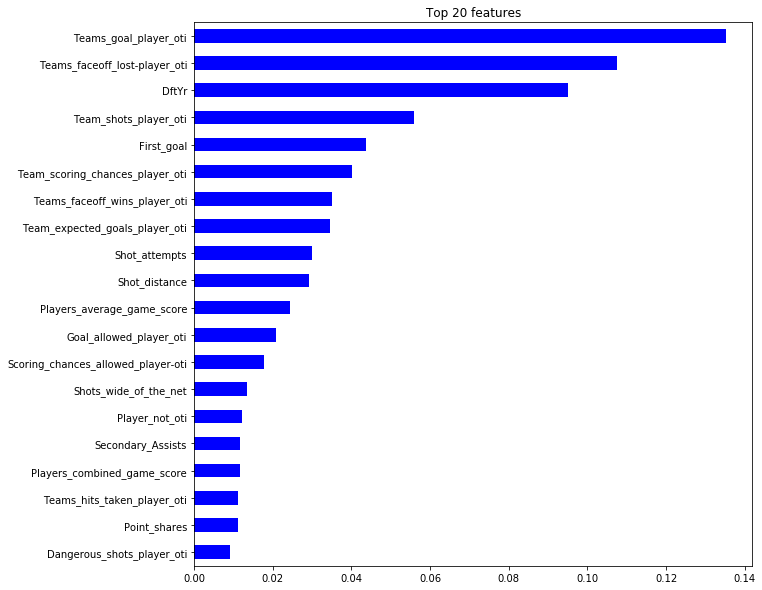

In [296]:
# Get feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

# 2. Drop-Column Importance

In [297]:
column  = 'Teams_goal_player_oti'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Score without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Score with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Score without Teams_goal_player_oti: 0.43552339040574617
Score with Teams_goal_player_oti: 0.4526107315779647
Drop-Column Importance for Teams_goal_player_oti: 0.01708734117221855


# 3. Permutation Importance

In [298]:
# BEFORE: Sequence of the feature to be permuted
feature = 'Teams_goal_player_oti'
X_val[feature].head()

319   75
412   40
150   90
191   65
515   75
Name: Teams_goal_player_oti, dtype: float64

In [299]:
# BEFORE: Distribution of the feature to be permuted
X_val[feature].value_counts()

0      8
85     4
75     4
1      4
17     3
      ..
86     1
49     1
100    1
68     1
36     1
Name: Teams_goal_player_oti, Length: 61, dtype: int64

In [0]:
# PERMUTE!
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

In [301]:
# AFTER: Sequence has changed
X_val_permuted[feature].head()

319   49
412   71
150   70
191   14
515   46
Name: Teams_goal_player_oti, dtype: float64

In [302]:
# AFTER: Distribution hasn't changed!
X_val_permuted[feature].value_counts()

0     8
85    4
1     4
75    4
18    3
     ..
9     1
74    1
72    1
20    1
49    1
Name: Teams_goal_player_oti, Length: 61, dtype: int64

In [303]:
# Get the permutation importance
# Notice that we don't need to refit here!
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Score with {feature}: {score_with}')
print(f'Score with {feature} permuted: {score_permuted}')
print(f'Permutation importance: {score_with - score_permuted}')

Score with Teams_goal_player_oti: 0.4526107315779647
Score with Teams_goal_player_oti permuted: 0.44647433743547404
Permutation importance: 0.006136394142490675


In [304]:
# Rerun the permutation importance process, but for a different feature
feature = 'Goals'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Score with {feature}: {score_with}')
print(f'Score with {feature} permuted: {score_permuted}')
print(f'Permutation importance: {score_with - score_permuted}')

Score with Goals: 0.4526107315779647
Score with Goals permuted: 0.4533697038808876
Permutation importance: -0.0007589723029228779


#4.  Use xgboost for gradient boosting

In [305]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.48881146789287455


# Explain individual predictions with shapley value plots

# shapley value plots

In [358]:
# Arrange X features matrix & y target vector
features = ['Goals', 'Time_on_ice']
target = 'Salary'
X = df[features]
y = df[target]

# Fit model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Assign to X, y
features = ['Goals', 'Time_on_ice', 'Primary_assists', 'First_goal']
target = 'Salary'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [360]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)

search.fit(X_train, y_train);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.8s finished


In [361]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

Best hyperparameters {'max_depth': 15, 'max_features': 0.09997491581800289, 'n_estimators': 137}
Cross-validation MAE 1078751.1311393087


# Individual prediction with specific row

In [0]:
row = X_test.iloc[[0]]

In [363]:
y_test.iloc[[0]]

81    3400000
Name: Salary, dtype: int64

In [364]:
model.predict(row)

array([4067968.36982968])

In [314]:
import sklearn
import shap


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [315]:
# Base value is approximately equal to the mean baseline
explainer.expected_value, y_train.mean()

(2257228.569003565, 2231812.863372093)

In [316]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
shaps

(Goals, 19)              327,027
(Time_on_ice, 83410)     715,098
(Primary_assists, 23)    874,463
(First_goal, 3)         -105,848
dtype: float64

In [317]:
shaps.sum()

1810739.80082615

In [318]:
explainer.expected_value + shaps.sum()

4067968.3698297148

# Define the predict function

In [319]:
def predict(Goals, Teams_goal_player_oti, Primary_assists,First_goal):

    # Make dataframe from the inputs
    df = pd.DataFrame(
        data=[[Goals, Teams_goal_player_oti, Primary_assists, First_goal]], 
        columns=['Goals', 'Teams_goal_player_oti', 'Primary_assists', 'First_goal']
    )

    # Get the model's prediction
    pred = model.predict(df)[0]

    # Calculate shap values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(df)

    # Get series with shap values, feature names, & feature values
    feature_names = df.columns
    feature_values = df.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

    # Print results
    result = f'${pred:,.0f} estimated salary. \n\n'
    result += f'Starting from baseline of ${explainer.expected_value:,.0f} \n'
    result += shaps.to_string()
    print(result)


    # Show shapley values force plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=df
    )

predict(19, 25, 100, 3)

$2,944,927 estimated salary. 

Starting from baseline of $2,257,229 
(Goals, 19)                      543,593
(Teams_goal_player_oti, 25)   -1,127,754
(Primary_assists, 100)         1,342,851
(First_goal, 3)                  -70,992


In [320]:
predict(25, 45, 190, 32)

$6,627,628 estimated salary. 

Starting from baseline of $2,257,229 
(Goals, 25)                    1,219,197
(Teams_goal_player_oti, 45)   -1,089,524
(Primary_assists, 190)         1,550,163
(First_goal, 32)               2,690,563


# Partial Dependence Plots with 1 feature

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
from pdpbox.pdp import pdp_isolate, pdp_plot
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [0]:
feature = 'Points'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

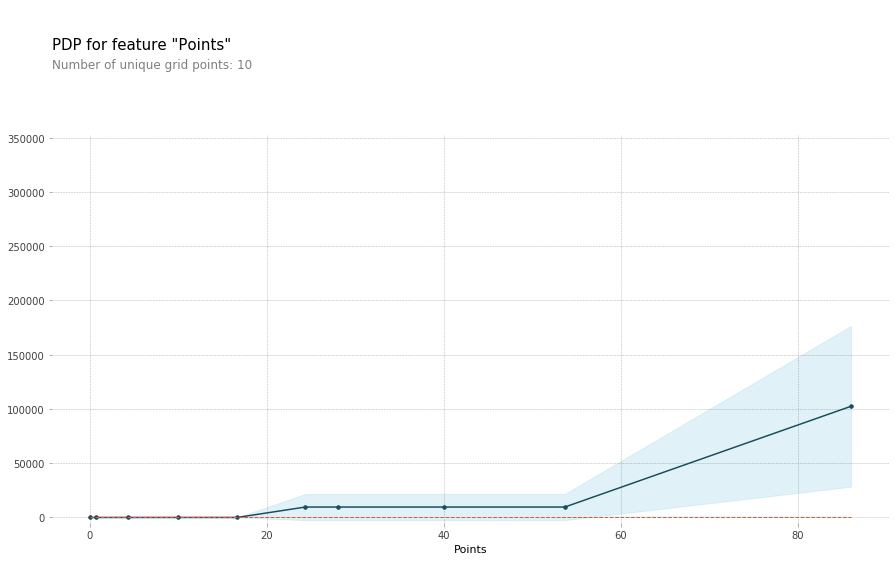

In [345]:
pdp_plot(isolated, feature_name=feature);

In [346]:
isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature, 
    num_grid_points=50
)

# How many predictions are required to make a PDP with 1 feature,
# given the size of our dataset, and the number of grid points?
len(X_val) * 50

5750

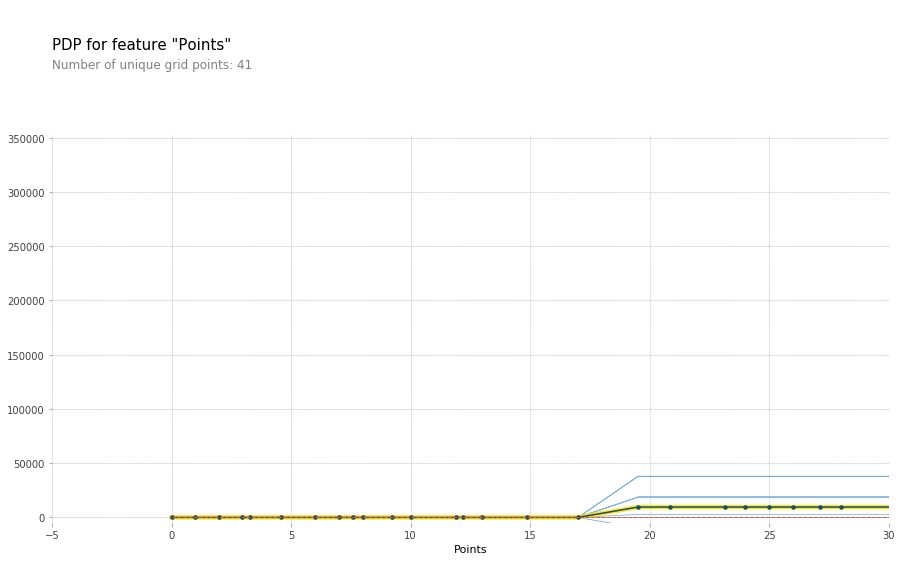

In [347]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, 
         frac_to_plot=0.2)

plt.xlim(-5,30);

# PDP with another feature

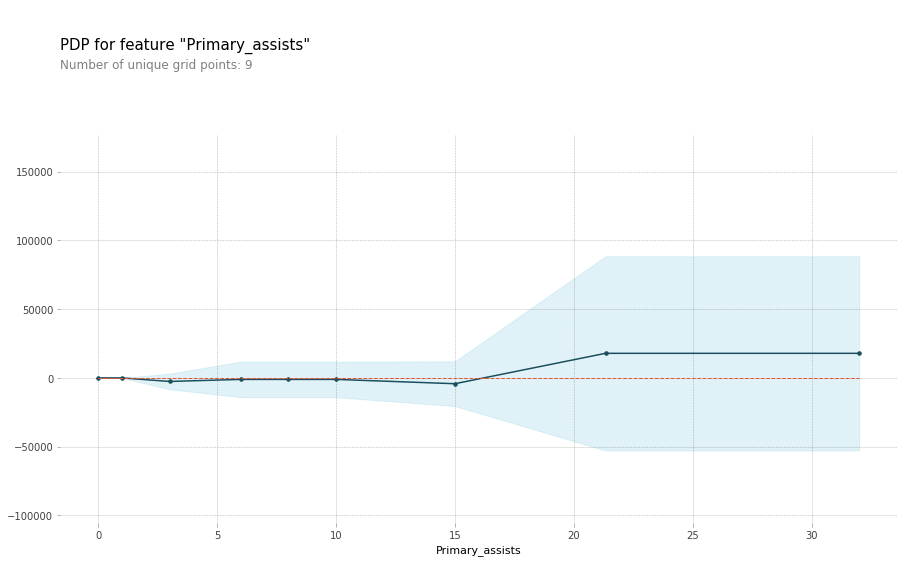

In [349]:
feature = 'Primary_assists'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);

In [351]:
isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature, 
    num_grid_points=30
)

# How many predictions are required to make a PDP with 1 feature,
# given the size of our dataset, and the number of grid points?
len(X_val) * 30

3450

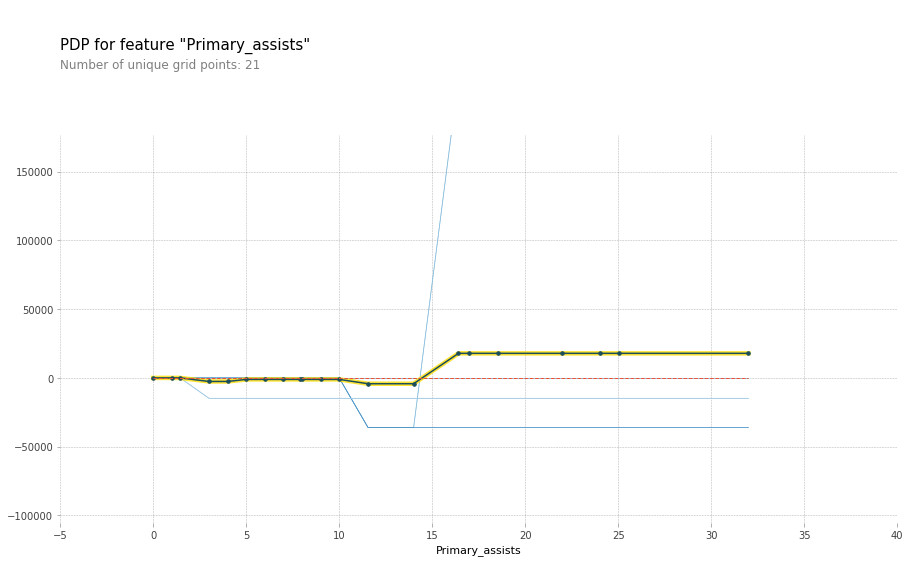

In [354]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, 
         frac_to_plot=0.2)

plt.xlim(-5,40);

# Partial Dependence Plots with 2 features

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [0]:
features = ['Goals', 'Time_on_ice']

interaction = pdp_interact(
    model=gb, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

(<Figure size 1080x1080 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f1ad062e8d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f1ad1e8b978>})

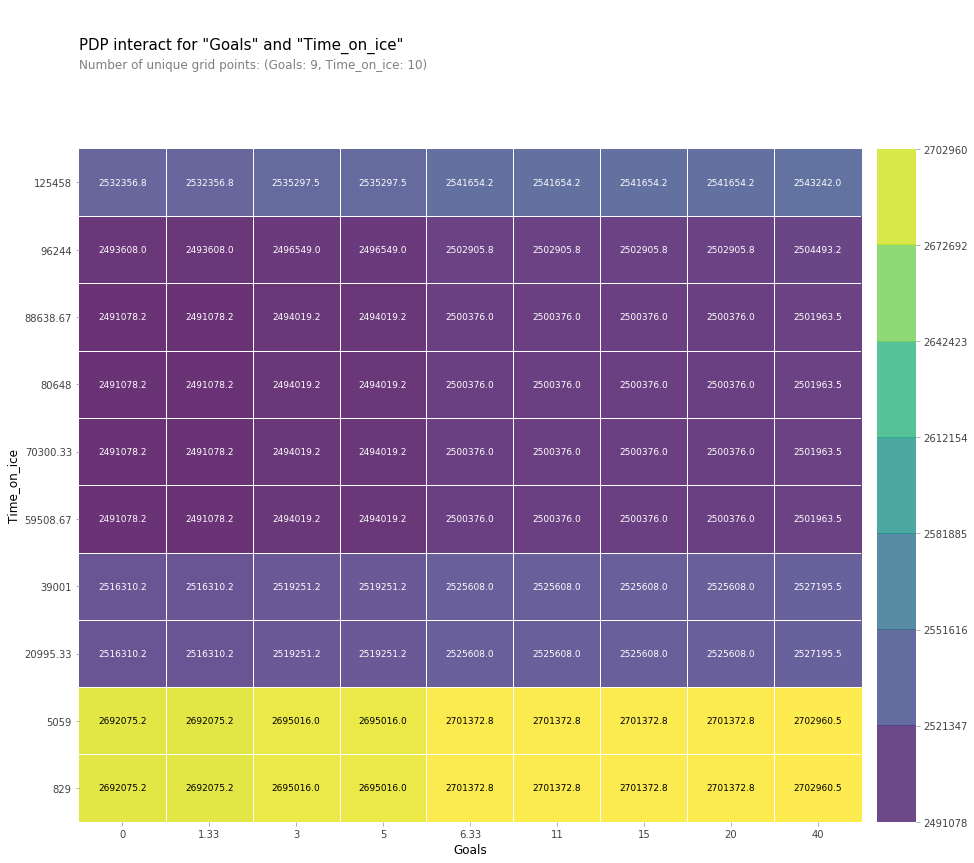

In [357]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features, figsize = (15, 15))

# 3D with Plotly!

In [0]:
# First, make the 2D plot above. Then ...

pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], 
    index=features[1]
)[::-1] # Slice notation to reverse index order so y axis is ascending

In [335]:
pdp = pdp.drop(columns=[0, 40])

pdp

Goals,1,3,5,6,11,15,20
Time_on_ice,,,,,,,
"125,458","2,532,357","2,535,298","2,535,298","2,541,654","2,541,654","2,541,654","2,541,654"
"96,244","2,493,608","2,496,549","2,496,549","2,502,906","2,502,906","2,502,906","2,502,906"
"88,639","2,491,078","2,494,019","2,494,019","2,500,376","2,500,376","2,500,376","2,500,376"
"80,648","2,491,078","2,494,019","2,494,019","2,500,376","2,500,376","2,500,376","2,500,376"
"70,300","2,491,078","2,494,019","2,494,019","2,500,376","2,500,376","2,500,376","2,500,376"
"59,509","2,491,078","2,494,019","2,494,019","2,500,376","2,500,376","2,500,376","2,500,376"
"39,001","2,516,310","2,519,251","2,519,251","2,525,608","2,525,608","2,525,608","2,525,608"
"20,995","2,516,310","2,519,251","2,519,251","2,525,608","2,525,608","2,525,608","2,525,608"
"5,059","2,692,075","2,695,016","2,695,016","2,701,373","2,701,373","2,701,373","2,701,373"


In [336]:
import plotly.graph_objs as go

surface = go.Surface(
    x=pdp.columns, 
    y=pdp.index, 
    z=pdp.values
)


layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title=target)
    )
)

fig = go.Figure(surface, layout)
fig.show()